포켓몬

- #: 포켓몬 고유식별자(id)
- Name: 포켓몬 이름
- Type 1: 공격에 대한 상성을 나타낼수 있는 유형1
- Type 2: 유형1와같은건데 2개를 가질수있음
- Total: 포켓몬이 얼마나강한지의 일반적인 능력치
- HP: 포켓몬이 맞을수있는 체력
- Attack: 일반공격
- Defense: 일반공격의 저항할수있는거
- SP Atk: 특수 공격, 특수 공격의 기본 수정자(예: 화염 폭발, 버블빔)
- SP Def: 특수 공격에 대한 기본 피해 저항
- Speed: 각 라운드마다 어떤포켓몬이 공격할지 정하는 순서
- Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int
- Legendary : 전설의 포켓몬 여부. !! Target feature !! bool

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [100]:
import os
csv_path = os.getenv("HOME") +"/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)

In [101]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [102]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [103]:
# 일반 포켓몬의 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [104]:
# 결측치 확인하기
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [105]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [106]:
# 총 800개의 데이터셋인데
len(set(pokemon["#"])) # 721개밖에 안나옴

721

In [107]:
pokemon[pokemon["#"] == 6]
# 예를 들어 #6의 포켓몬은 Charizard, CharizardMega Charizard X, CharizardMega Charizard Y 세 개로 나뉩니다.
# 기본 포켓몬인 Charizard(리자몽)로부터 시작해서 진화한 Mega Charizard가 있고, X, Y는 버전을 나타내는 것으로 보입니다.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [108]:
# Name 컬럼의 중복도 확인
len(set(pokemon["Name"])) # 800개이므로 Name의 중복은 없다

800

In [109]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [110]:
# 각 Type1, Type2의 속성은 몇개인가
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [111]:
# Type2가 Type1보다 1개더많은데 확인
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [112]:
# Type을 저장
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Fire', 'Psychic', 'Bug', 'Steel', 'Water', 'Ghost', 'Ice', 'Poison', 'Electric', 'Flying', 'Dragon', 'Rock', 'Ground', 'Fairy', 'Dark', 'Normal', 'Grass', 'Fighting']


In [113]:
# 속성을 하나만 가지고있는 포켓몬 수
pokemon["Type 2"].isna().sum()

386

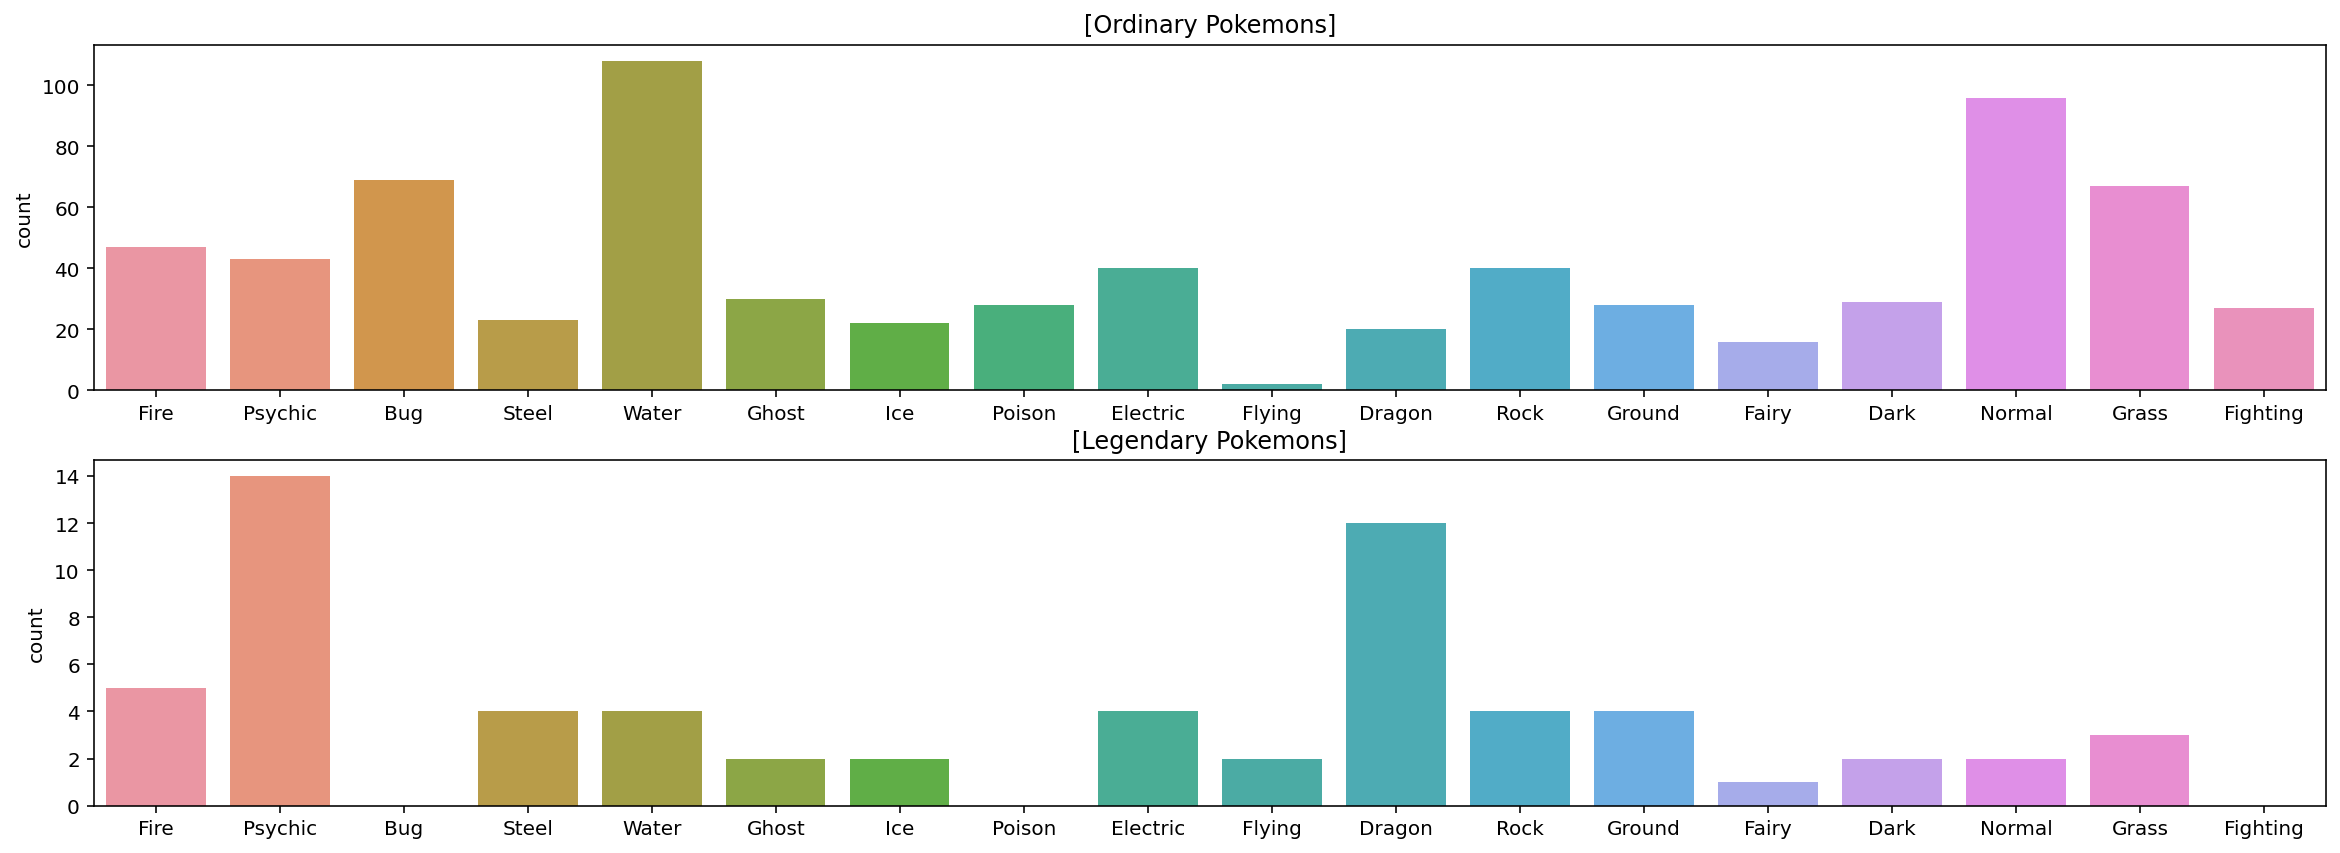

In [114]:
# 일반, 전설 포켓몬 시각화 x축은 Type 1 y축은 갯수
plt.figure(figsize=(20, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [115]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


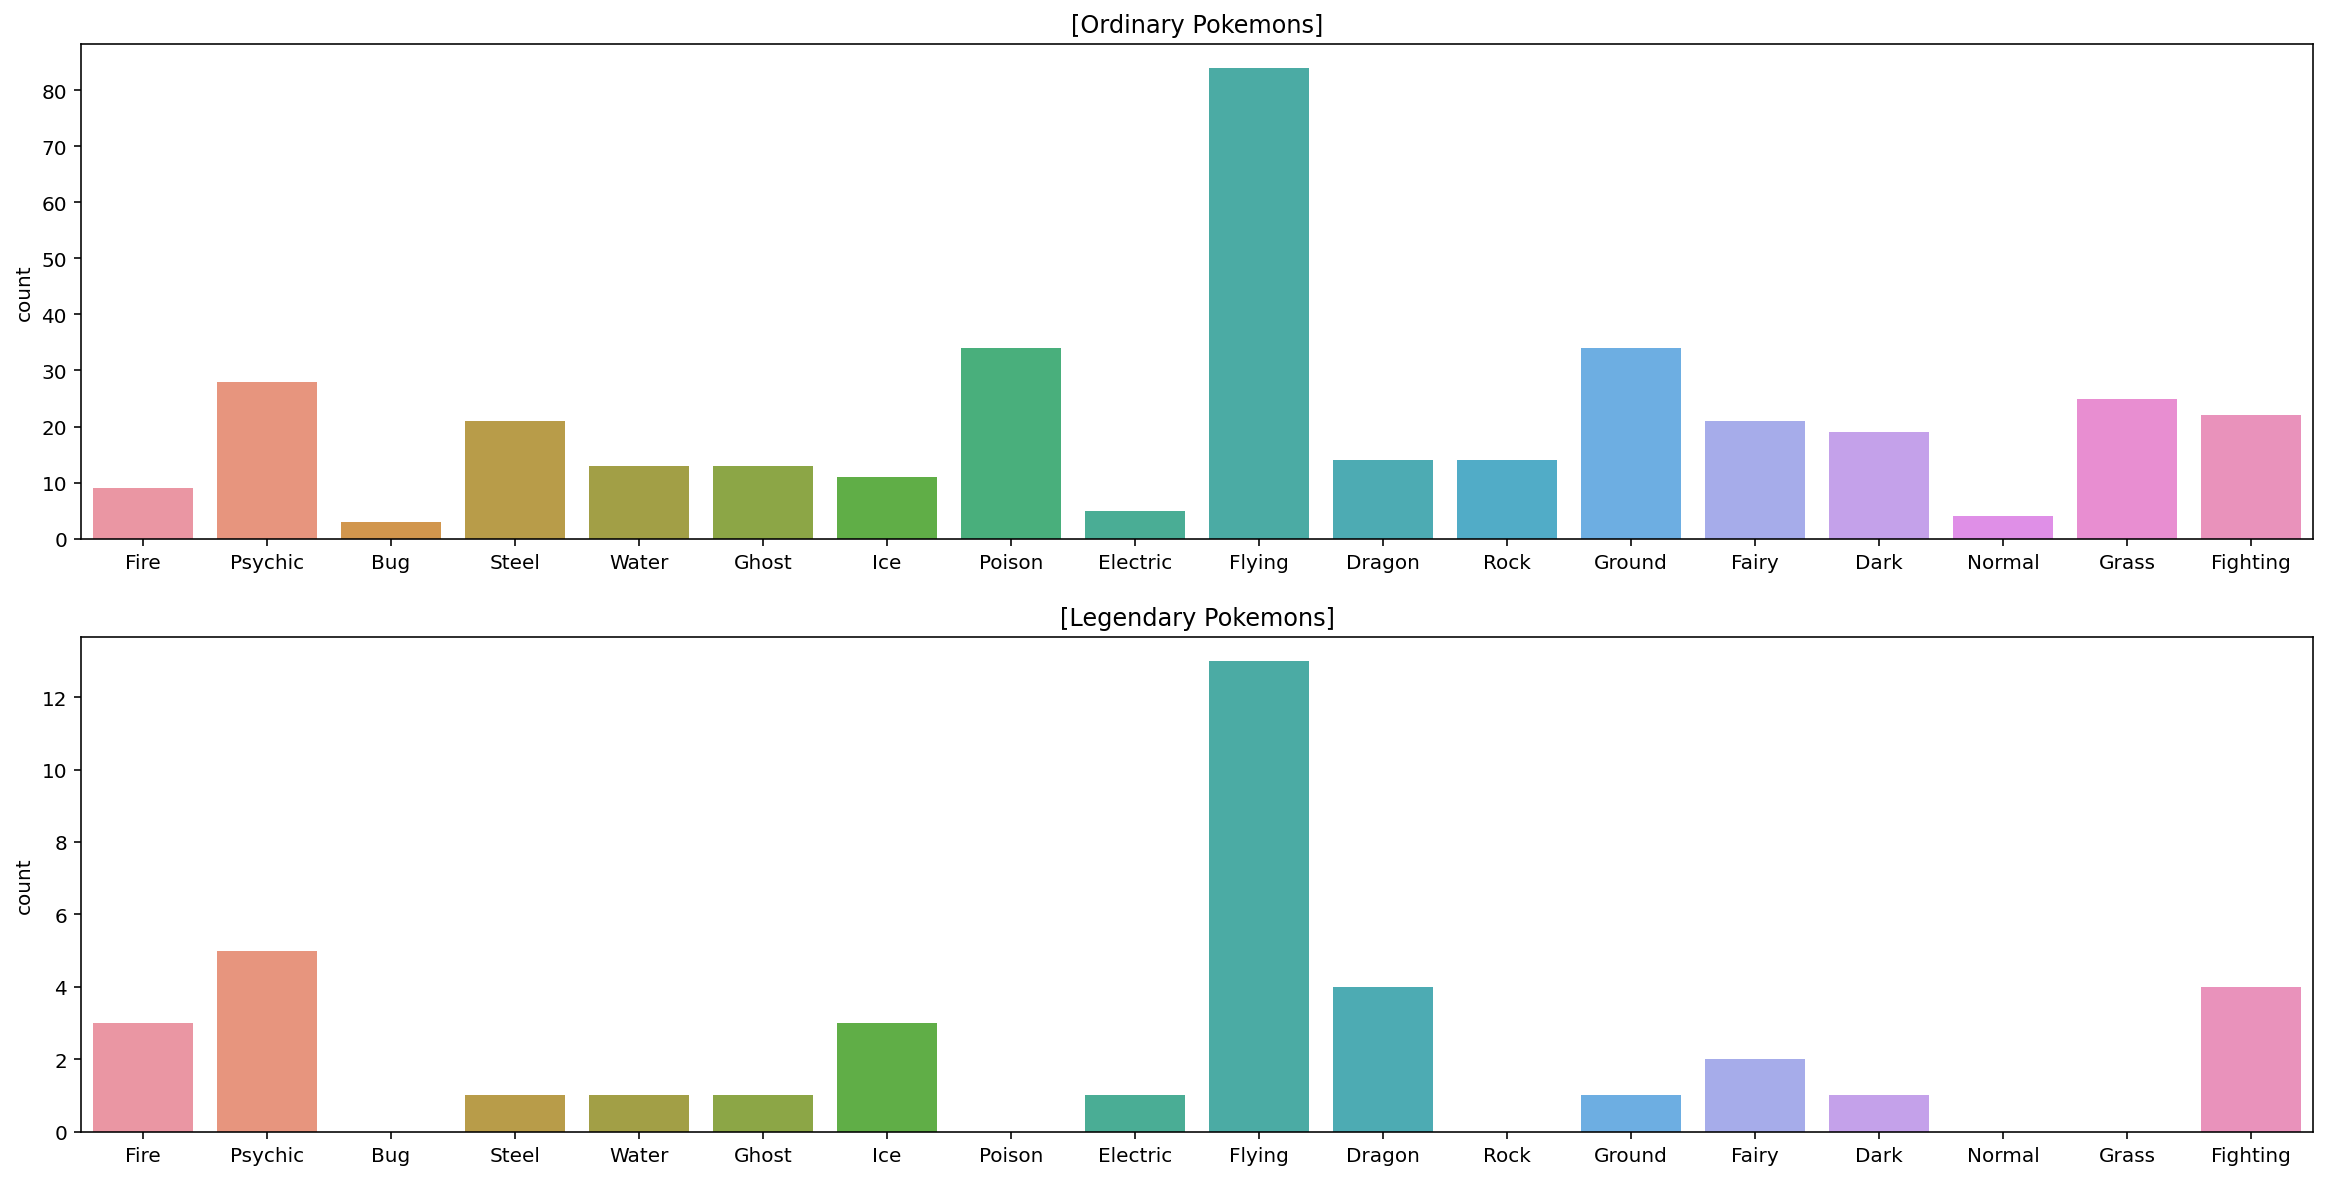

In [116]:
# Type2도 시각화 해보기
plt.figure(figsize=(20, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2",order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2",order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [117]:
# 스탯 확인해보기
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [118]:
# Total이 status의 합이 맞는지 검증해보기
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [119]:
# poken['Total']과 pokemon[status]의 총합이 같은 갯수 구하기
len(pokemon['Total'] == pokemon[stats].sum(axis=1))

800

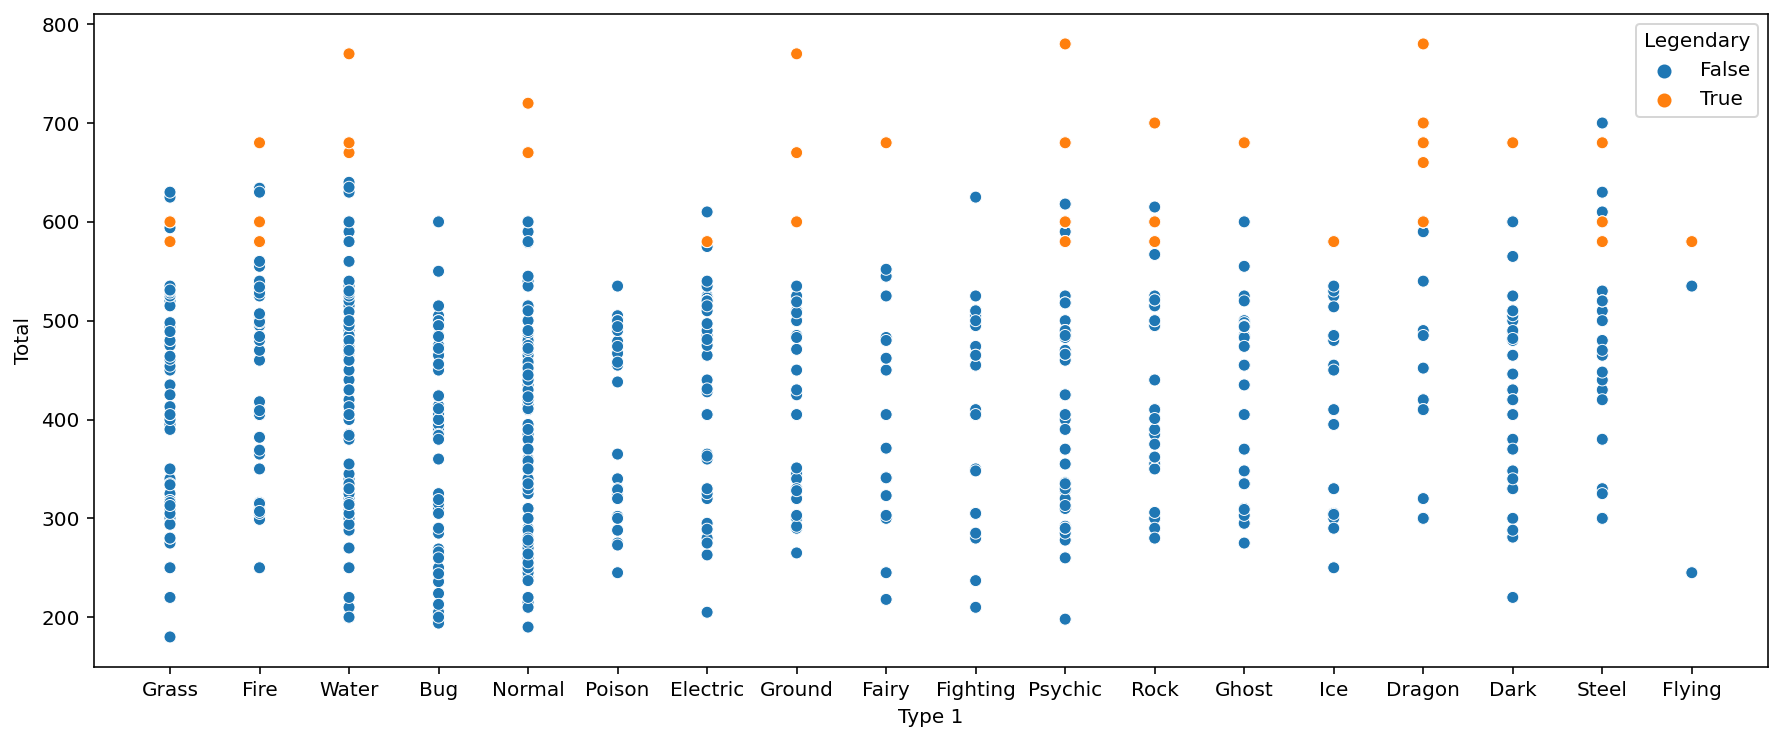

In [120]:
# Total과 Legendary가 무슨 관계가 있을까
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()# Total의 550정도보다 높음

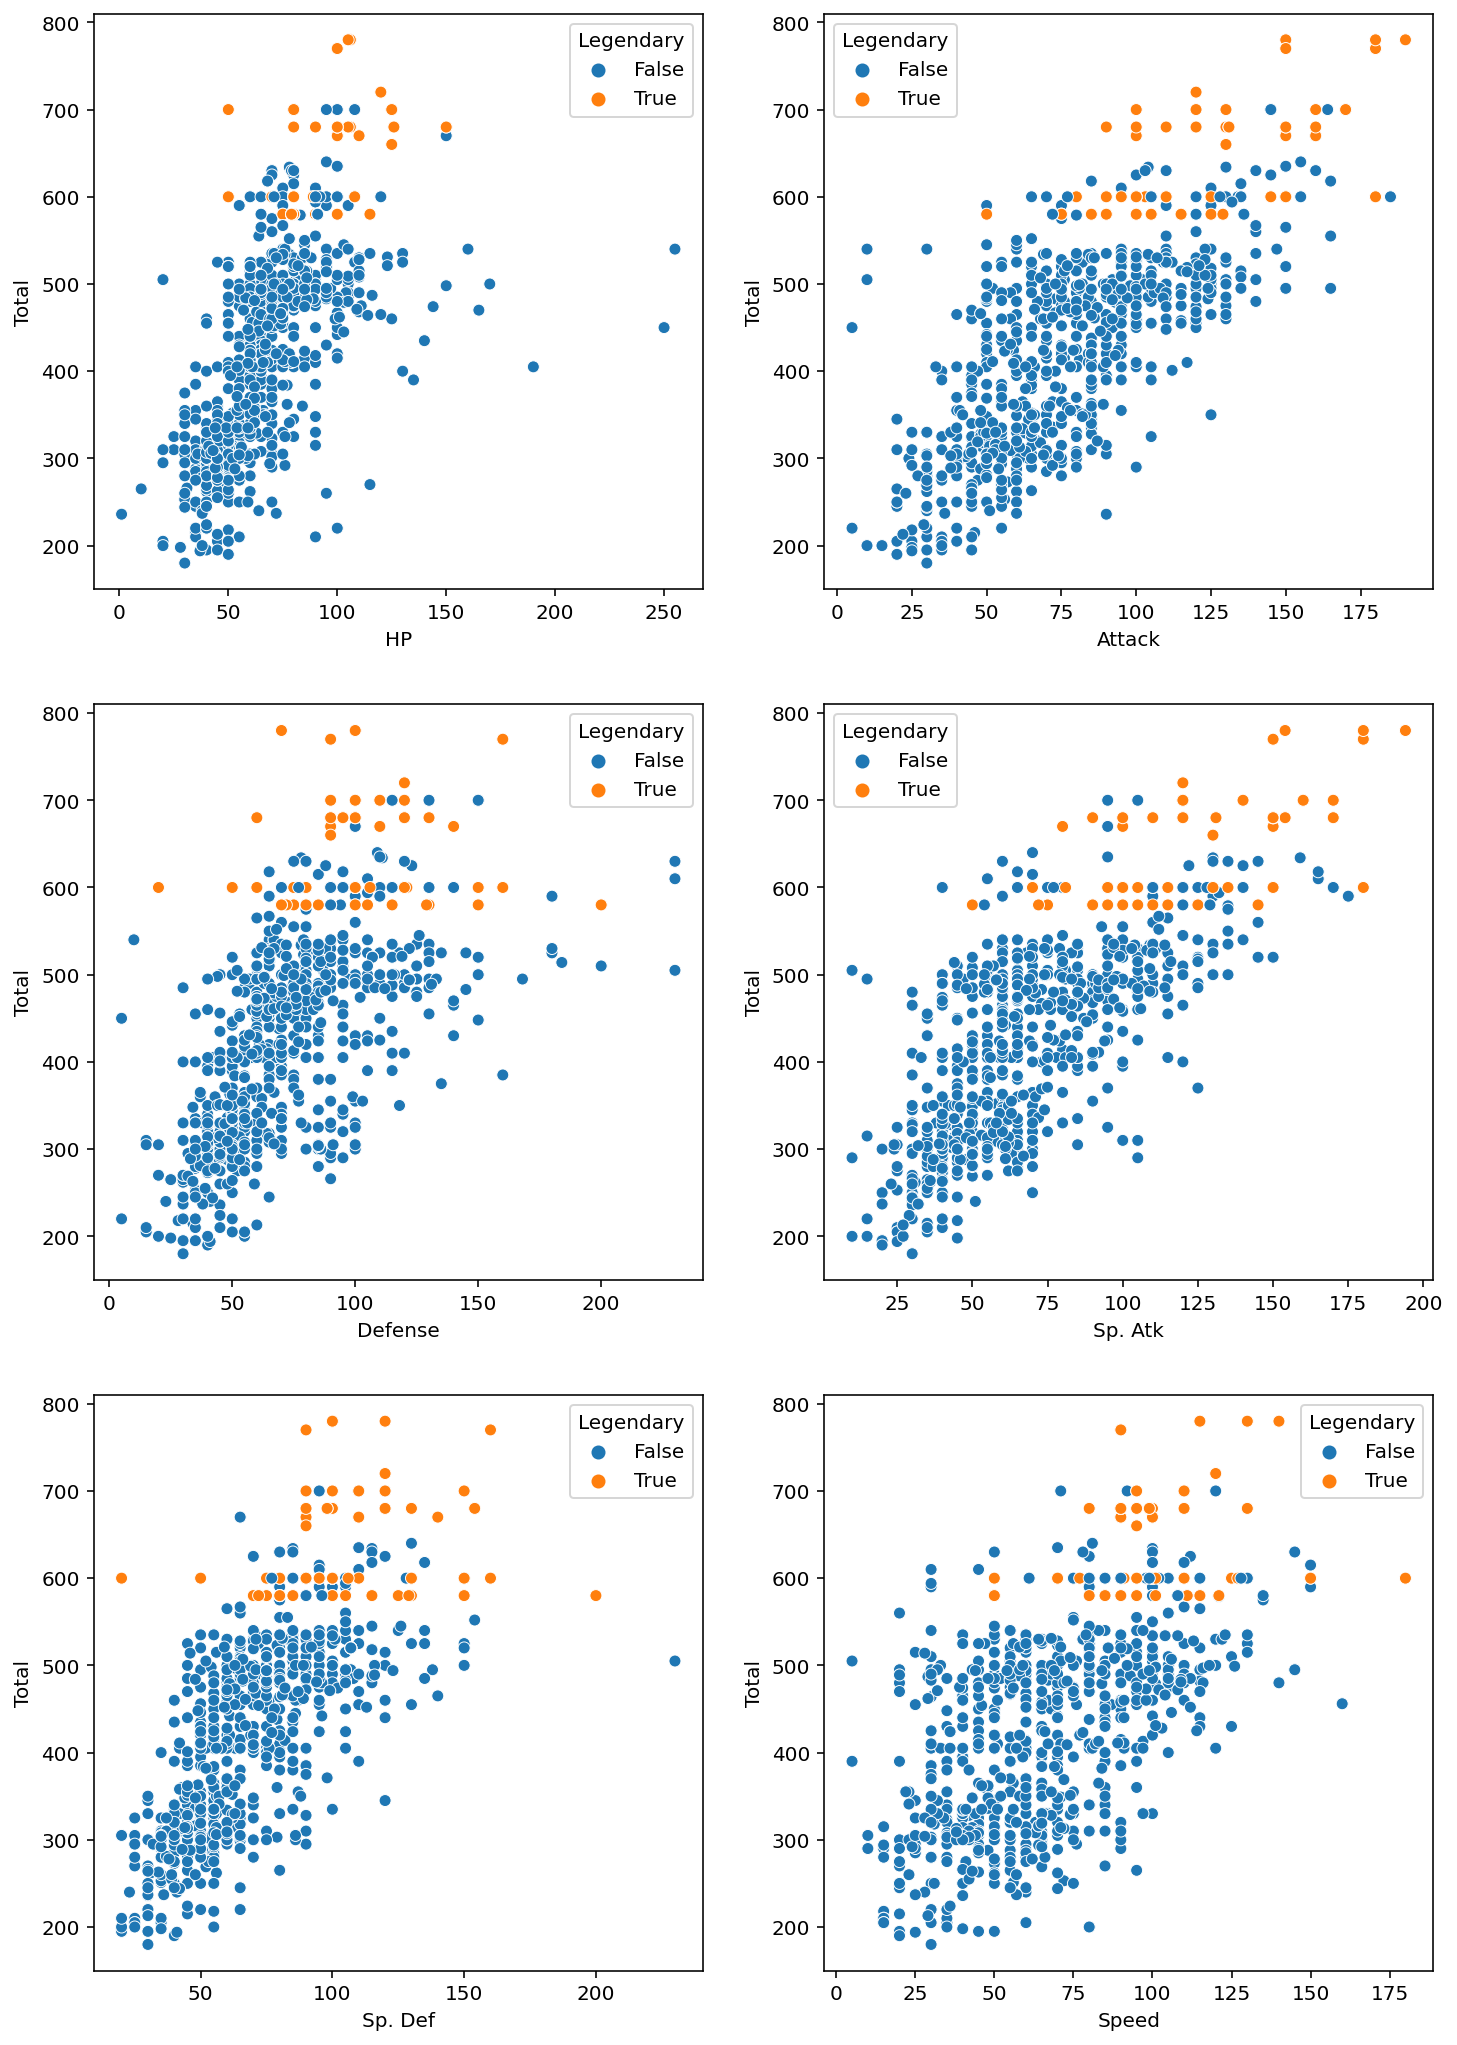

In [121]:
# 각각의 스텟을 시각화해보기
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)


# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

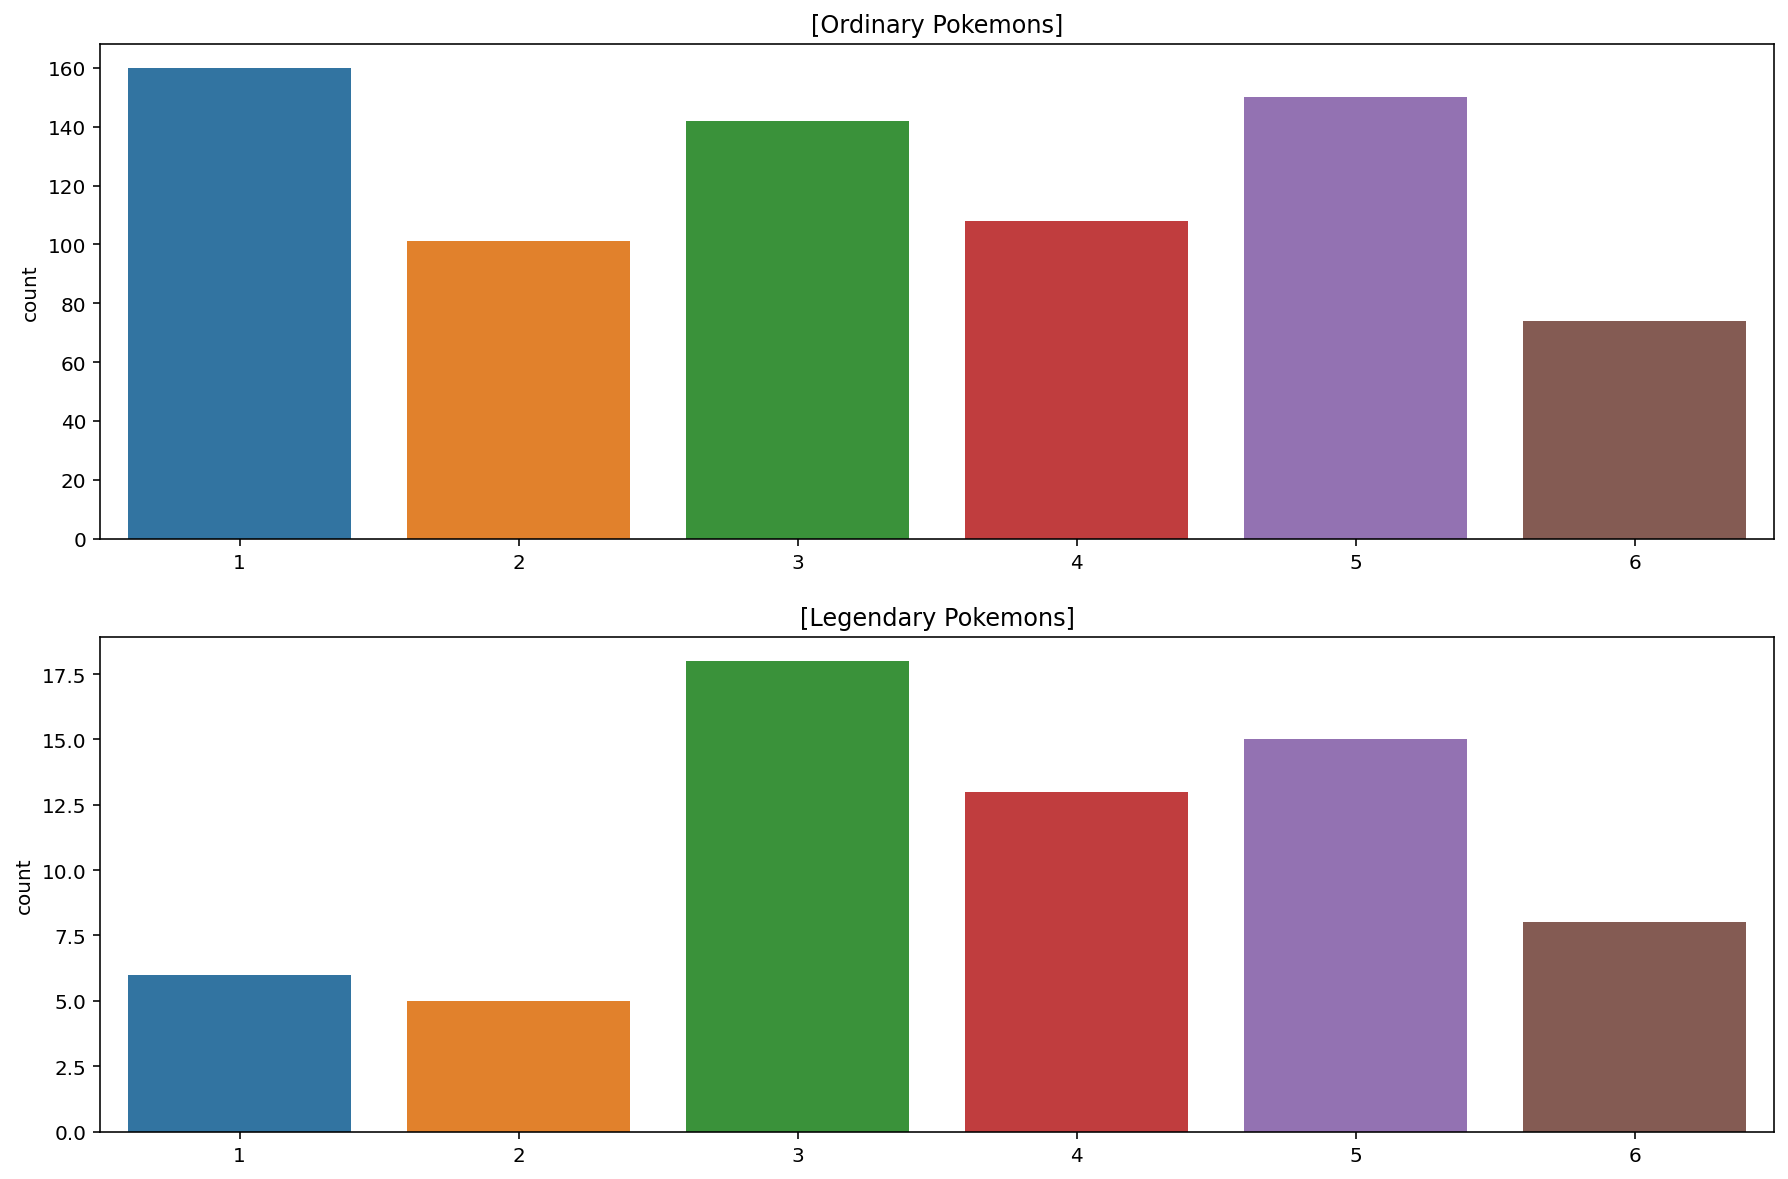

In [122]:
# 포켓몬 세대로 보기
plt.figure(figsize=(15, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

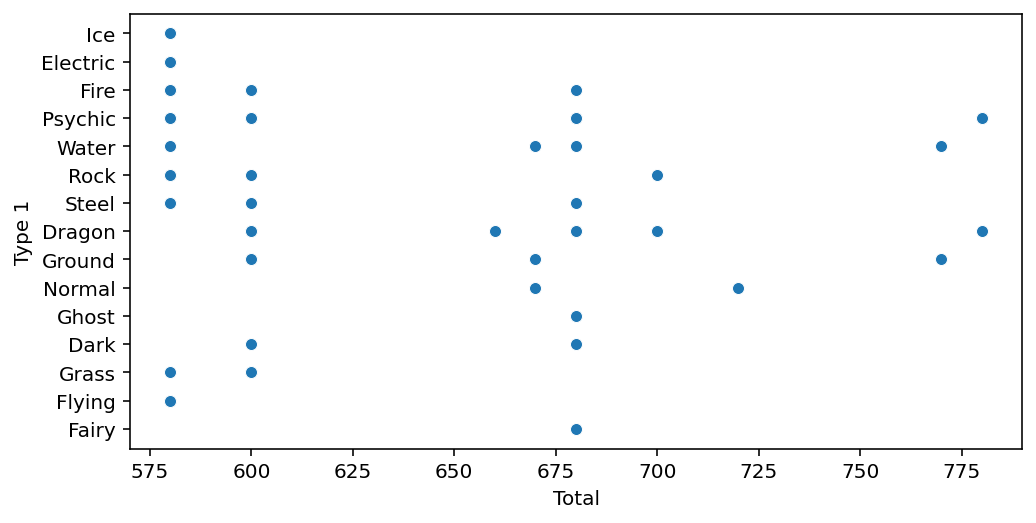

In [123]:
# 전설의 포켓몬의 Total값 보기
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [124]:
# 전설의 포케몬이 가지는 Total 의 범주는 9개밖에없음
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


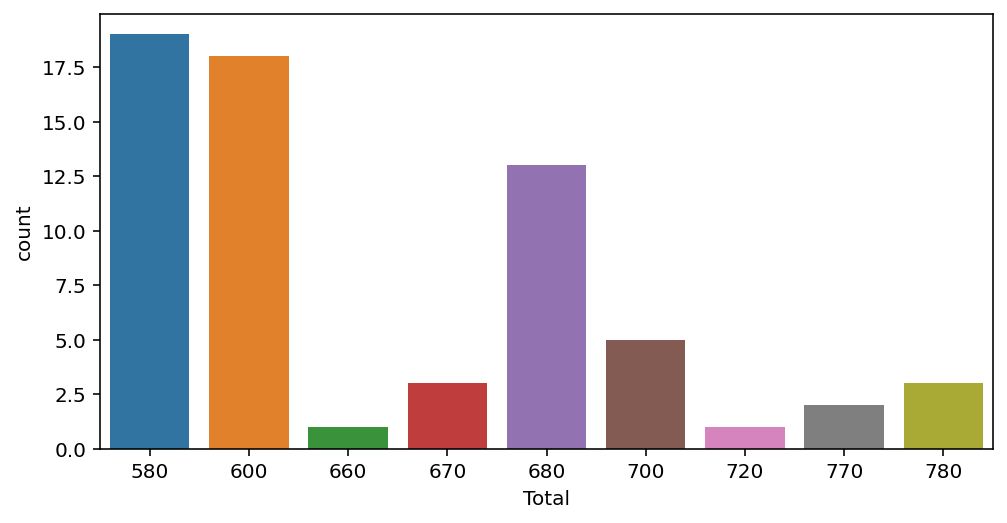

In [125]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [126]:
# 같은 방법으로 일반 포케몬의 Total 범주와 갯수보기
print(sorted(list(set(ordinary["Total"]))))
print(len(set(ordinary["Total"])))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]
195


In [127]:
# 전설의 포케몬의 이름을 보기
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [128]:
# forme 라는 글자가 들어간 전설의 포켓몬이 쫌 많다
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [129]:
# 전설의포케몬 데이터에 name_count 라는 이름으로 이름의 숫자를 센 컬럼을 추가
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [130]:
# 일반 포케몬 데이터에 name_count 라는 이름으로 이름의 숫자를 센 컬럼을 추가
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


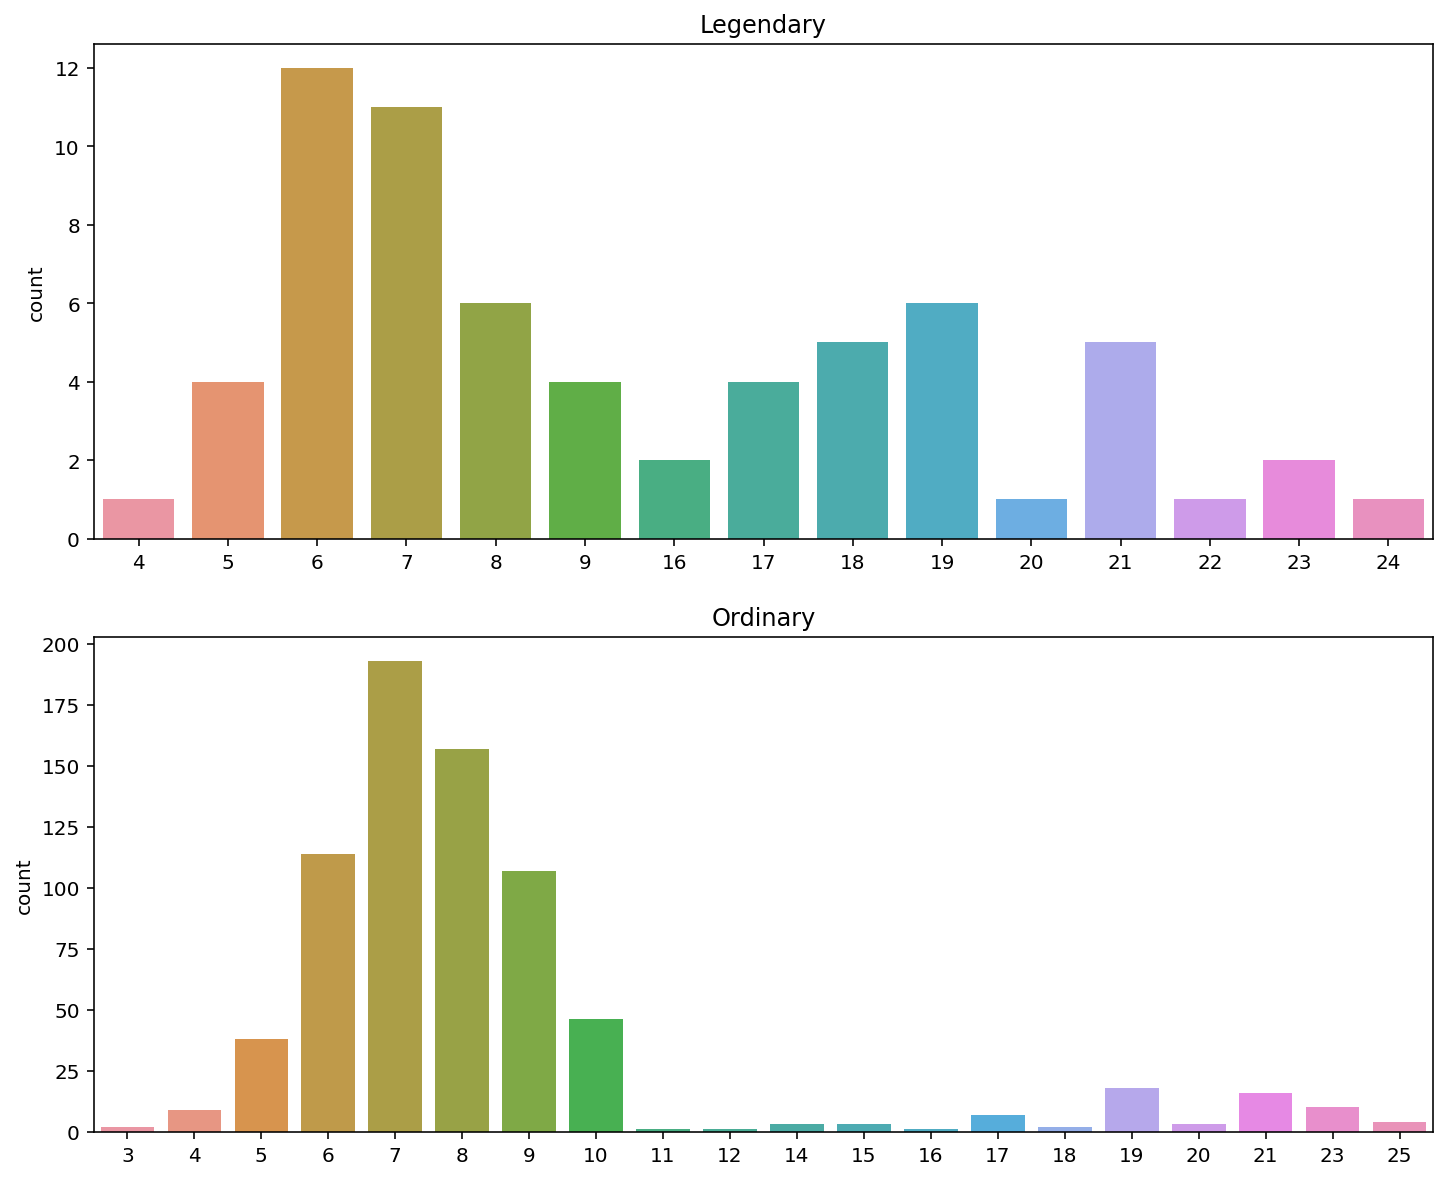

In [131]:
# 일반/전설 포케몬의 name_count를 시각화 하여 확인
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [132]:
# 전설 포케몬의 이름이 10글자 이상일경우의 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [133]:
# 일반 포케몬의 이름이 10자이상일경우의 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


In [134]:
# 이름이 열글자 이상인지 아닌지 name_count 컬럼 생성 (전체 데이터있는곳에 생성함)
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [135]:
# 이름이 10글자이상이면 long_name 컬럼에 True, 아니면 False
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [136]:
# 먼저 이름사이의 ,을 빈칸으로 replace
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [137]:
# isalpha로 이름이 알파벳으로 이루어진 컬럼은 name_isalpha에 True, 아니면 False
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [138]:
# 알파벳만으로 이루어져있지 않은 데이터 확인
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [139]:
# 알파벳만으로 이루어져있는게 9개뿐이 안되니 직접 바꾸고 확인
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [140]:
# 바꿔준 이름으로 다시 name_isalpha 반영
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


In [141]:
import re
name = "CharizardMega Charizard X"
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [142]:
temp = name_split[0]
temp

'CharizardMega'

In [143]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [144]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [145]:
# 위는 하나만 토큰화한거고 전체적용을위해 함수작성
def tokenize(name):
    tokens = []
    for part_name in name.split(' '):
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    return np.array(tokens)

In [146]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [147]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [148]:
from collections import Counter
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [149]:
# 각 토큰별로 포함되어있는지 아닌지
# 각 토큰의 이름컬럼마다 True, False 머신러닝 모델에선 문자열 그대로 학습에 사용할 수 없어서
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [150]:
# type 별로 원핫 인코딩
print(types)
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

['Fire', 'Psychic', 'Bug', 'Steel', 'Water', 'Ghost', 'Ice', 'Poison', 'Electric', 'Flying', 'Dragon', 'Rock', 'Ground', 'Fairy', 'Dark', 'Normal', 'Grass', 'Fighting']


,Type 1,Type 2,Fire,Psychic,Bug,Steel,Water,Ghost,Ice,Poison,Electric,Flying,Dragon,Rock,Ground,Fairy,Dark,Normal,Grass,Fighting
0,Grass,Poison,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,Grass,Poison,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,Grass,Poison,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,Grass,Poison,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,Fire,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [151]:
# 베이스라인 모델 (지금까지 데이터 탐색 및 전처리 한걸로 만드는 모델)
# 새로 만드는 모델은 이 베이스라인 모델을 기준으로 더 성능이 잘나와야 한다가 일반적

In [152]:
# 원본데이터 다시보기
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [153]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [154]:
# #(id)와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [155]:
target = 'Legendary' # 타겟컬럼 저장

In [156]:
# 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [157]:
# target 컬럼의 데이터를 변수 'y'에 저장
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [158]:
# 훈련데이터, 학습 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [159]:
# 의사결정 트리로 학습해보기
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [160]:
# 훈련 및 예측
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [161]:
# 예측 결과 오차행렬 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# TN, FP
# FN, TP

array([[144,   3],
       [  5,   8]])

In [162]:
# classfication_report로 precision, recall, f1-score,
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# 베이스라인 모델의 Recall은 0.62임

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [163]:
# 전처리 했던것들을 적용시켜 모델 학습해보기
print(len(pokemon.columns))
print(pokemon.columns)
# 원래 13개 컬럼이였는데 전처리로 45개까지 확장함

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Fire', 'Psychic', 'Bug', 'Steel', 'Water', 'Ghost', 'Ice', 'Poison',
       'Electric', 'Flying', 'Dragon', 'Rock', 'Ground', 'Fairy', 'Dark',
       'Normal', 'Grass', 'Fighting'],
      dtype='object')


In [164]:
# 전처리했던 데이터에서 필요없는 컬럼들을 빼고 선택
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [165]:
target = "Legendary"
target

'Legendary'

In [166]:
# 필요한 컬럼만 지정해서 X에 저장
X = pokemon[features]
print(X.shape)
X.info() # int64아니면 bool임

(800, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       800 non-null    int64
 1   HP          800 non-null    int64
 2   Attack      800 non-null    int64
 3   Defense     800 non-null    int64
 4   Sp. Atk     800 non-null    int64
 5   Sp. Def     800 non-null    int64
 6   Speed       800 non-null    int64
 7   Generation  800 non-null    int64
 8   name_count  800 non-null    int64
 9   long_name   800 non-null    bool 
 10  Forme       800 non-null    bool 
 11  Mega        800 non-null    bool 
 12  Mewtwo      800 non-null    bool 
 13  Deoxys      800 non-null    bool 
 14  Kyurem      800 non-null    bool 
 15  Latias      800 non-null    bool 
 16  Latios      800 non-null    bool 
 17  Kyogre      800 non-null    bool 
 18  Groudon     800 non-null    bool 
 19  Hoopa       800 non-null    bool 
 20  Poison      800 non-nu

In [167]:
# 정답데이터도 y에 저장
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [168]:
# 학습용, 훈련용 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [169]:
# 전처리(피처 엔지니어링)으로 준비한 데이터로 다시 학습 및 예측,평가
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [170]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [171]:
# classfication_report로 precision, recall, f1-score,
# 예측 결과 오차행렬 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# TN, FP
# FN, TP

array([[141,   6],
       [  1,  12]])

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# 베이스라인 모델의 Recall은 0.62였는데 -> 0.92로 올라감

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



# 피처엔지니어링 +
- Generation은 세대 컬럼인데 이게 그냥 정수다. 정규화시켜서 학습해보기

In [175]:
test = pokemon.copy()
test[target]

0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800, dtype: bool

In [187]:
test['Generation'] # 데이터확인

count    800.000000
mean       0.175192
std        0.076096
min        0.076923
25%        0.092308
50%        0.200000
75%        0.230769
max        0.276923
Name: Generation, dtype: float64

In [177]:
# 전체 전설의 포케몬 총 갯수, 세대마다 총 갯수
num_legendary_pokemon = len(test[test[target] == True])
print(f'총 데이터셋의 전설의 포켓몬 갯수: {num_legendary_pokemon}')

for num, gen in enumerate(set(test['Generation'])):
    print(f'{num+1} 세대 전설의 포켓몬 {len(test[(test[target] == True) & (test["Generation"] == gen)])}마리')

# 세대마다 전설의 포케몬수 / 전체세대 전설의 포케몬수 적용
for num, gen in enumerate(set(test['Generation'])):
    test.loc[test['Generation'] == gen, 'Generation'] = len(test[(test[target] == True) & (test["Generation"] == gen)]) / num_legendary_pokemon

총 데이터셋의 전설의 포켓몬 갯수: 65
1 세대 전설의 포켓몬 6마리
2 세대 전설의 포켓몬 5마리
3 세대 전설의 포켓몬 18마리
4 세대 전설의 포켓몬 13마리
5 세대 전설의 포켓몬 15마리
6 세대 전설의 포켓몬 8마리


In [179]:
# 확인
test['Generation']
# print(len(set(test['Generation']))) #6

0      0.092308
1      0.092308
2      0.092308
3      0.092308
4      0.092308
         ...   
795    0.123077
796    0.123077
797    0.123077
798    0.123077
799    0.123077
Name: Generation, Length: 800, dtype: float64

In [180]:
# 필요한 컬럼만 지정해서 X에 저장
X = test[features]
print(X.shape)
X.info() # int64아니면 bool임

(800, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Total       800 non-null    int64  
 1   HP          800 non-null    int64  
 2   Attack      800 non-null    int64  
 3   Defense     800 non-null    int64  
 4   Sp. Atk     800 non-null    int64  
 5   Sp. Def     800 non-null    int64  
 6   Speed       800 non-null    int64  
 7   Generation  800 non-null    float64
 8   name_count  800 non-null    int64  
 9   long_name   800 non-null    bool   
 10  Forme       800 non-null    bool   
 11  Mega        800 non-null    bool   
 12  Mewtwo      800 non-null    bool   
 13  Deoxys      800 non-null    bool   
 14  Kyurem      800 non-null    bool   
 15  Latias      800 non-null    bool   
 16  Latios      800 non-null    bool   
 17  Kyogre      800 non-null    bool   
 18  Groudon     800 non-null    bool   
 19  Hoopa       800 non

In [181]:
# 정답데이터도 y에 저장
y = test[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [182]:
# 학습용, 훈련용 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [183]:
# 전처리(피처 엔지니어링)으로 준비한 데이터로 다시 학습 및 예측,평가
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [184]:
# classfication_report로 precision, recall, f1-score,
# 예측 결과 오차행렬 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# TN, FP
# FN, TP

array([[141,   6],
       [  1,  12]])

In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# 별차이가 없어보인다

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



In [188]:
pokemon['Generation']

0      1
1      1
2      1
3      1
4      1
      ..
795    6
796    6
797    6
798    6
799    6
Name: Generation, Length: 800, dtype: int64

# 피처엔지니어링 +
- 세대컬럼을 아예 뺴기

In [197]:
features2 = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']


test2 = pokemon.copy()

# 필요한 컬럼만 지정해서 X에 저장
X = test2[features2]
print(X.shape)
X.info() # int64아니면 bool임

# 정답데이터도 y에 저장
y = test2[target]
print(y.shape)
y.head()

# 학습용, 훈련용 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 전처리(피처 엔지니어링)으로 준비한 데이터로 다시 학습 및 예측,평가
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

(800, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       800 non-null    int64
 1   HP          800 non-null    int64
 2   Attack      800 non-null    int64
 3   Defense     800 non-null    int64
 4   Sp. Atk     800 non-null    int64
 5   Sp. Def     800 non-null    int64
 6   Speed       800 non-null    int64
 7   name_count  800 non-null    int64
 8   long_name   800 non-null    bool 
 9   Forme       800 non-null    bool 
 10  Mega        800 non-null    bool 
 11  Mewtwo      800 non-null    bool 
 12  Deoxys      800 non-null    bool 
 13  Kyurem      800 non-null    bool 
 14  Latias      800 non-null    bool 
 15  Latios      800 non-null    bool 
 16  Kyogre      800 non-null    bool 
 17  Groudon     800 non-null    bool 
 18  Hoopa       800 non-null    bool 
 19  Poison      800 non-null    bool 
 20  Ground      800 non-nu

In [198]:
# classfication_report로 precision, recall, f1-score,
# 예측 결과 오차행렬 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# TN, FP
# FN, TP

array([[141,   6],
       [  1,  12]])

In [199]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# 별차이가 없어보인다

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



In [195]:
X.shape

(800, 37)

# 피처엔지니어링 +
- Total만 살리고 다른 이와 관련된 컬럼 빼기(HP, Attack, Defense, Sp. Atk, Sp.Def, Speed)

In [203]:
features3 = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
             'name_count', 'long_name', 'Forme', 'Mega', 'Mewtwo', 'Deoxys', 'Kyurem', 'Latias', 'Latios',
             'Kyogre', 'Groudon', 'Hoopa', 'Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
             'Electric', 'Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

features3 = [feature for feature in features3 if feature not in stats]

test3 = pokemon.copy()

# 필요한 컬럼만 지정해서 X에 저장
X = test3[features3]
print(X.shape)
X.info() # int64아니면 bool임

# 정답데이터도 y에 저장
y = test3[target]
print(y.shape)
y.head()

# 학습용, 훈련용 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 전처리(피처 엔지니어링)으로 준비한 데이터로 다시 학습 및 예측,평가
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

(800, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       800 non-null    int64
 1   name_count  800 non-null    int64
 2   long_name   800 non-null    bool 
 3   Forme       800 non-null    bool 
 4   Mega        800 non-null    bool 
 5   Mewtwo      800 non-null    bool 
 6   Deoxys      800 non-null    bool 
 7   Kyurem      800 non-null    bool 
 8   Latias      800 non-null    bool 
 9   Latios      800 non-null    bool 
 10  Kyogre      800 non-null    bool 
 11  Groudon     800 non-null    bool 
 12  Hoopa       800 non-null    bool 
 13  Poison      800 non-null    bool 
 14  Ground      800 non-null    bool 
 15  Flying      800 non-null    bool 
 16  Normal      800 non-null    bool 
 17  Water       800 non-null    bool 
 18  Fire        800 non-null    bool 
 19  Electric    800 non-null    bool 
 20  Rock        800 non-nu

In [204]:
# classfication_report로 precision, recall, f1-score,
# 예측 결과 오차행렬 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# TN, FP
# FN, TP

array([[144,   3],
       [  2,  11]])

In [208]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# 정확도는 올라갔지만 recall이 더줄어들음 0.92 -> 0.85

              precision    recall  f1-score   support

       False       0.99      0.98      0.98       147
        True       0.79      0.85      0.81        13

    accuracy                           0.97       160
   macro avg       0.89      0.91      0.90       160
weighted avg       0.97      0.97      0.97       160



# 모델을 바꿔보기 (랜덤 포레스트)

In [209]:
features4 = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

test4 = pokemon.copy()

# 필요한 컬럼만 지정해서 X에 저장
X = test4[features4]
print(X.shape)
X.info() # int64아니면 bool임

# 정답데이터도 y에 저장
y = test4[target]
print(y.shape)
y.head()

# 학습용, 훈련용 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       800 non-null    int64
 1   HP          800 non-null    int64
 2   Attack      800 non-null    int64
 3   Defense     800 non-null    int64
 4   Sp. Atk     800 non-null    int64
 5   Sp. Def     800 non-null    int64
 6   Speed       800 non-null    int64
 7   Generation  800 non-null    int64
 8   name_count  800 non-null    int64
 9   long_name   800 non-null    bool 
 10  Forme       800 non-null    bool 
 11  Mega        800 non-null    bool 
 12  Mewtwo      800 non-null    bool 
 13  Deoxys      800 non-null    bool 
 14  Kyurem      800 non-null    bool 
 15  Latias      800 non-null    bool 
 16  Latios      800 non-null    bool 
 17  Kyogre      800 non-null    bool 
 18  Groudon     800 non-null    bool 
 19  Hoopa       800 non-null    bool 
 20  Poison      800 non-nu

In [230]:
# 랜덤포레스트 분류로 사용
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= 1000,random_state=25)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [231]:
# classfication_report로 precision, recall, f1-score,
# 예측 결과 오차행렬 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# TN, FP
# FN, TP

array([[143,   4],
       [  3,  10]])

In [232]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# 정확도는 올라갔지만 recall이 더줄어들음 0.92 -> 0.77

              precision    recall  f1-score   support

       False       0.98      0.97      0.98       147
        True       0.71      0.77      0.74        13

    accuracy                           0.96       160
   macro avg       0.85      0.87      0.86       160
weighted avg       0.96      0.96      0.96       160



In [233]:
# GridSearchCV로 최적의 하이퍼 파라미터 찾아보기
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
model = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(model, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


In [237]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
model = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 8,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [238]:
# classfication_report로 precision, recall, f1-score,
# 예측 결과 오차행렬 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# TN, FP
# FN, TP

array([[144,   3],
       [  5,   8]])

In [240]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# 하이퍼파라미터 최적화도 해봤지만 recall이 더줄어들음 0.92 -> 0.62

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160

